In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
onerow = [255, 100, 170, 170, 50, 50, 50, 50, 170, 170, 100, 80, 80, 255 ,255 ]

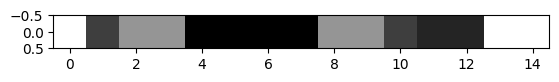

In [24]:
imshow([onerow], cmap='gray')

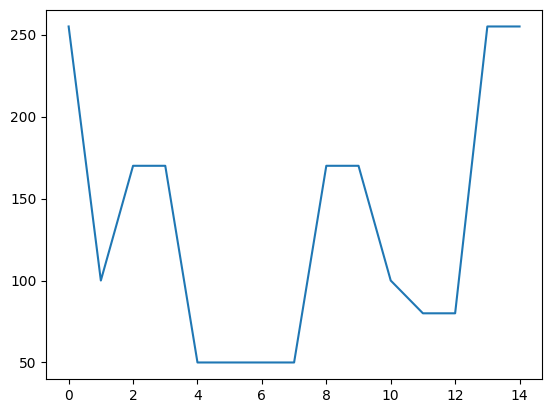

In [25]:
plt.plot(onerow)

In [26]:
first = [255 ] * 15

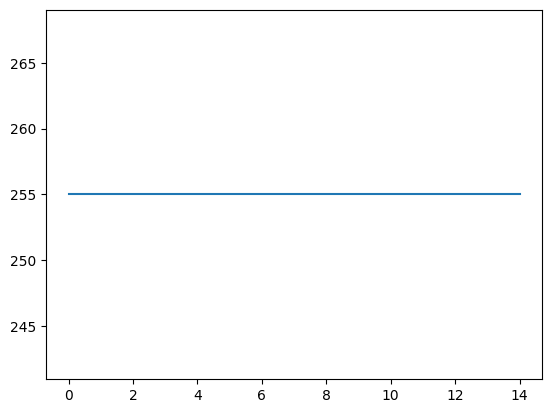

In [27]:
plt.plot(first)

In [28]:
second = [255] * 10
second += [170, 100]
second += [255] *3

In [29]:
second

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 170, 100, 255, 255, 255]

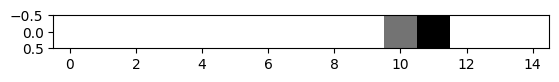

In [30]:
imshow([second], cmap='gray')

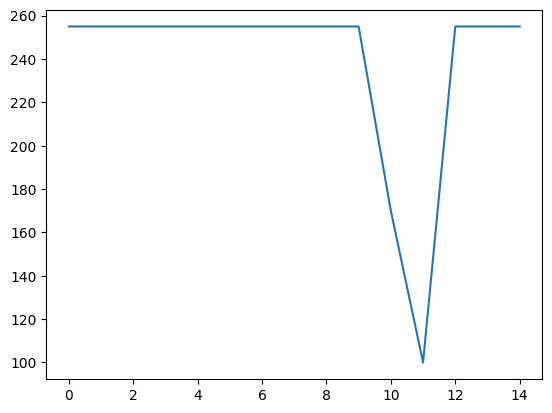

In [31]:
plt.plot(second)

In [32]:
onerowbarcode = [255,255] + [0]*7 + [255] *3 + [0] + [255]*2 + [0] * 4 + [255]*2 + [0]*2 + [255] + [0]*7 + [255,255]

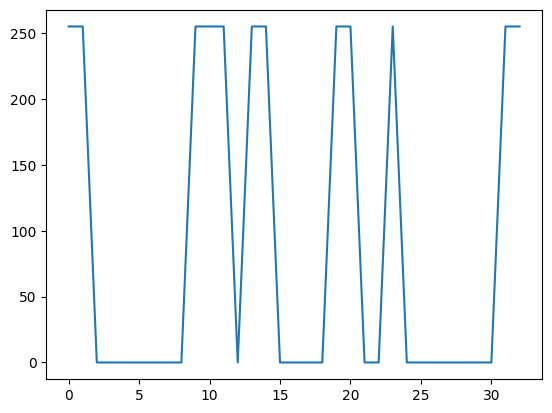

In [33]:
plt.plot(onerowbarcode)

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
!wget https://cs666.org/data/spongebob.jpg

--2026-02-03 17:34:45--  https://cs666.org/data/spongebob.jpg
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119411 (117K) [image/jpeg]
Saving to: ‘spongebob.jpg.1’

spongebob.jpg.1     100%[===================>] 116.61K  --.-KB/s    in 0.02s   

2026-02-03 17:34:46 (6.50 MB/s) - ‘spongebob.jpg.1’ saved [119411/119411]



In [36]:
!pip install mahotas

In [37]:
import mahotas as mh

In [38]:
i = mh.imread('spongebob.jpg')

In [39]:
i.shape

(720, 1280, 3)

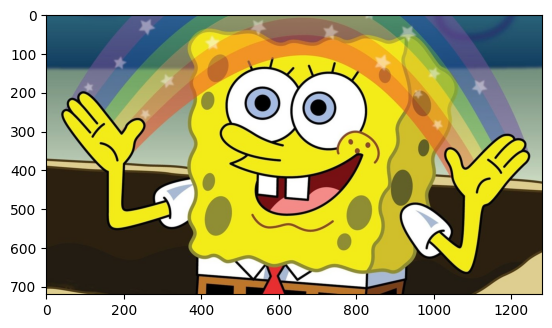

In [40]:
imshow(i)

In [41]:
i = mh.imread('spongebob.jpg')[:,:,:3].mean(axis=2) # we need grayscale

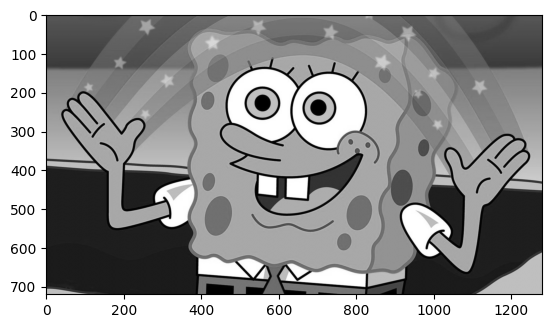

In [42]:
imshow(i, cmap='gray')

In [43]:
S = np.fft.fft2(i)

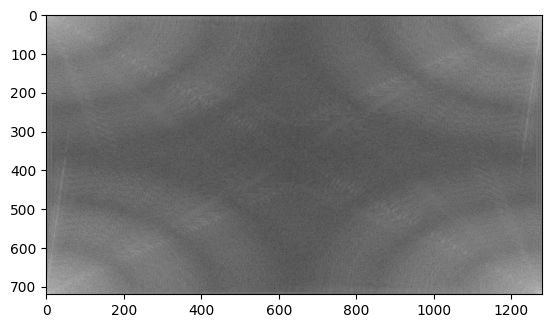

In [44]:
imshow( np.log( abs(S) ) , cmap = 'gray' )

In [45]:
S_centered = np.fft.fftshift(S)

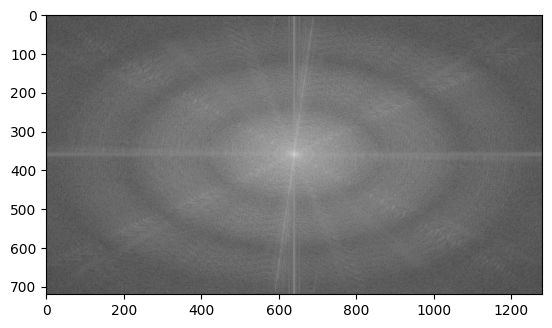

In [46]:
imshow( np.log( abs(S_centered) ) , cmap='gray')

In [47]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def lowpass(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def highpass(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

In [48]:
S_centered_filtered = S_centered * highpass( 5, i.shape )

In [49]:
Sinv = np.fft.ifftshift(S_centered_filtered)
Sinv = np.fft.ifft2(Sinv)

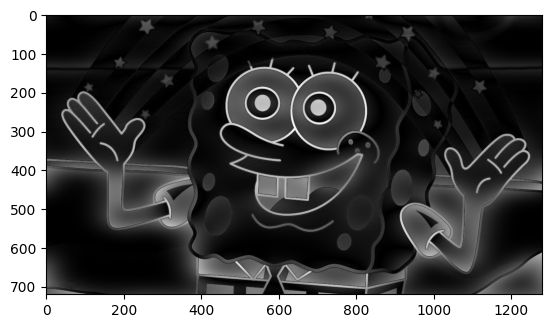

In [50]:
imshow(abs(Sinv), cmap='gray')

In [51]:
S_centered_filtered = S_centered * lowpass( 20, i.shape )

In [52]:
Sinv = np.fft.ifftshift(S_centered_filtered)
Sinv = np.fft.ifft2(Sinv)

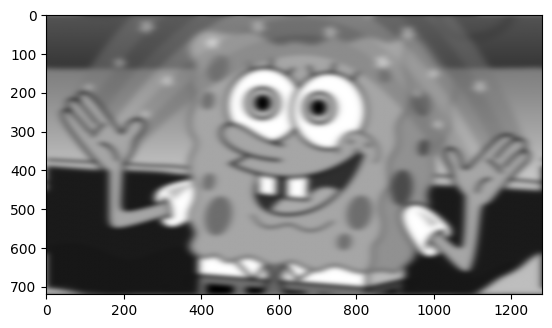

In [53]:
imshow(abs(Sinv), cmap='gray')